#Analisando os dados de vacinação no estado de pernambuco

Link de acessoa aos dados:
https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/ef3bd0b8-b605-474b-9ae5-c97390c197a8


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
!wget -P "/content/drive/MyDrive/FTCD" https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-04-27/uf%3DPE/part-00000-53593f94-65af-4044-9190-46f46c9fdb31.c000.csv

--2021-04-28 13:10:13--  https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-04-27/uf%3DPE/part-00000-53593f94-65af-4044-9190-46f46c9fdb31.c000.csv
Resolving s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)... 52.95.164.18
Connecting to s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)|52.95.164.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 895231332 (854M) [text/csv]
Saving to: ‘/content/drive/MyDrive/FTCD/part-00000-53593f94-65af-4044-9190-46f46c9fdb31.c000.csv’

part-00000-53593f94 100%[===================>] 853.76M  18.0MB/s    in 67s     

2021-04-28 13:11:21 (12.7 MB/s) - ‘/content/drive/MyDrive/FTCD/part-00000-53593f94-65af-4044-9190-46f46c9fdb31.c000.csv’ saved [895231332/895231332]



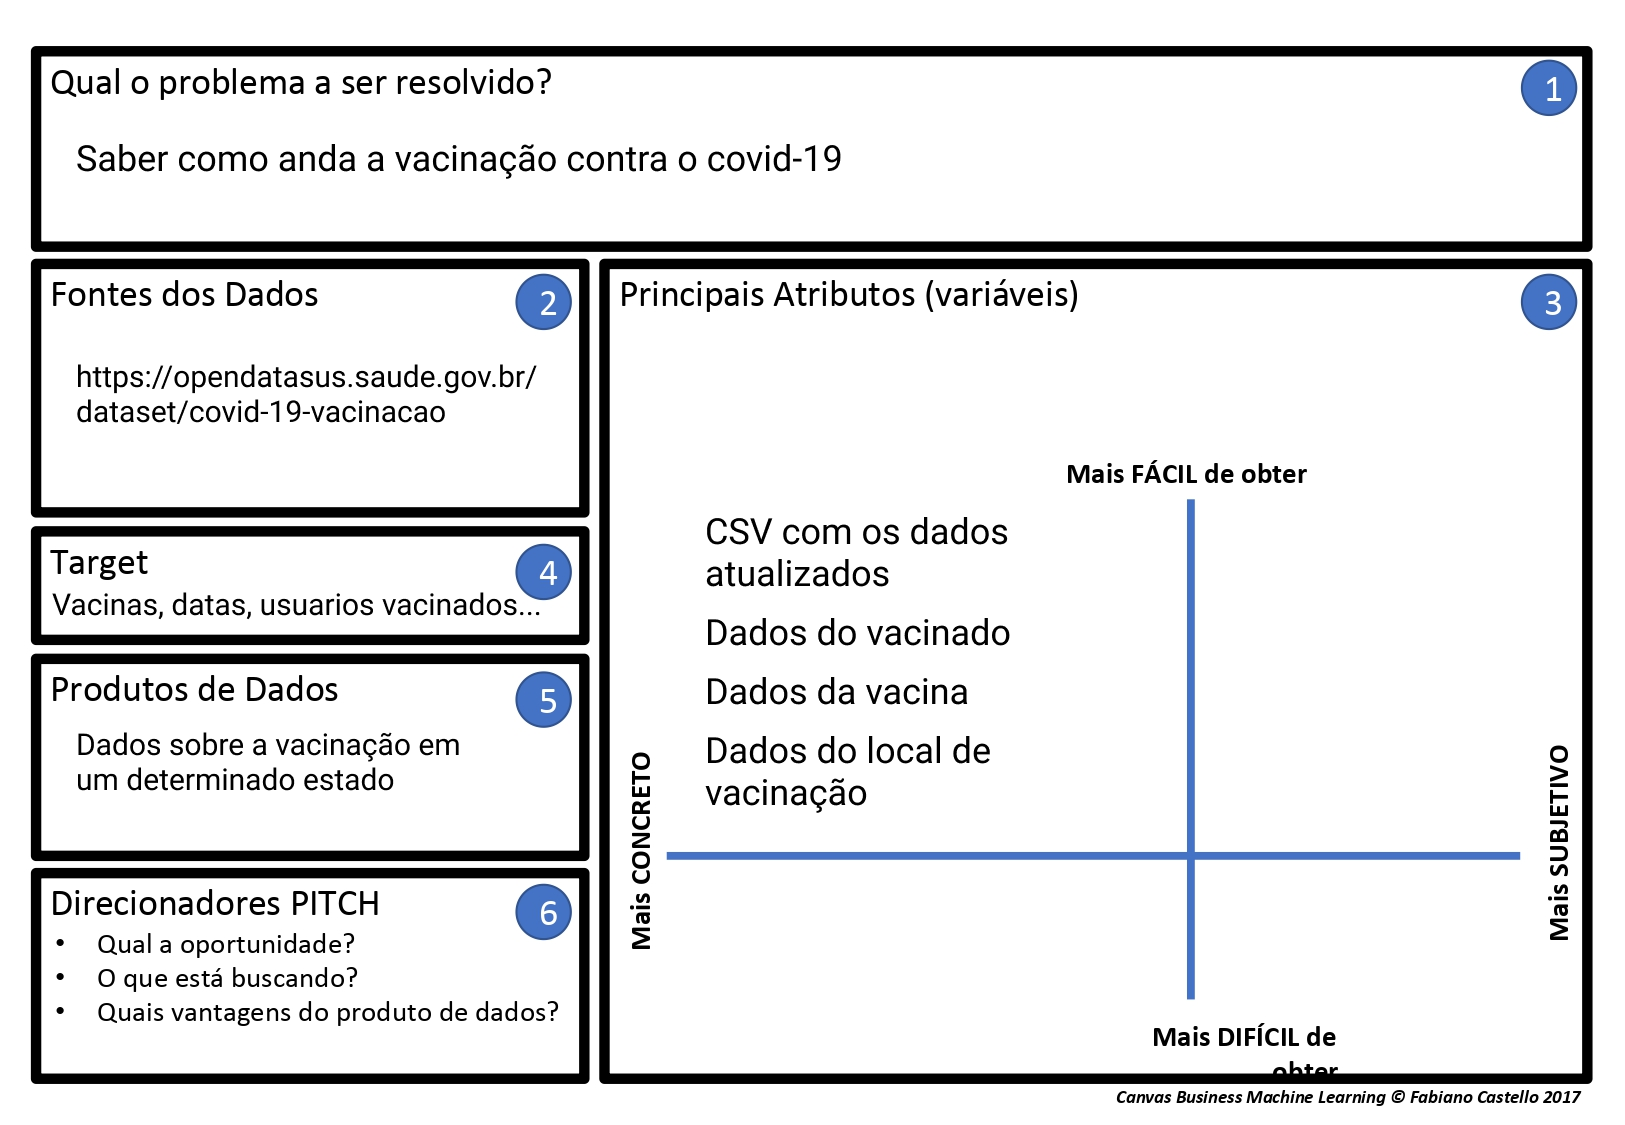

In [3]:
df_vacina = pd.read_csv('/content/drive/MyDrive/FTCD/part-00000-53593f94-65af-4044-9190-46f46c9fdb31.c000.csv', sep=';')

In [4]:
df_vacina

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,985de29b-6169-42e7-9bcf-f7ab05845f09-i0b0,62ba60cbc41e60d4911292a937647bd1d4676b68b0e50c...,70,1950-05-31,M,1,BRANCA,260890.0,10.0,LIMOEIRO,BRASIL,PE,55700.0,B,2350513,PREFEITURA MUNICIPAL DE LIMOEIRO,UNIDADE DE SAUDE DA FAMILIA VIRGILIO LAPENDA,260890,LIMOEIRO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210080,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-23T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-25 13:52:07,16341
1,0b8e2f2c-4877-4f6c-836b-b2339570948a-i0b0,6308ed94e0bca060b4211a746e3a45843173810ae4c4f9...,71,1949-06-08,F,4,AMARELA,261360.0,10.0,SAO JOSE DO EGITO,BRASIL,PE,56700.0,B,2635666,PREFEITURA MUNICIPAL DE SAO JOSE DO EGITO,ESF RIACHO DO MEIO I,261360,SAO JOSE DO EGITO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210080,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-23T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-26 10:26:09,16341
2,f3e29cfb-c6a4-4770-9e80-2cf593e904e9-i0b0,186fcab4650b3c3f1b641d4235e892ddfa0ff6e581893d...,32,1988-04-03,F,3,PARDA,260590.0,10.0,GAMELEIRA,BRASIL,PE,55530.0,B,6374980,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,SECRETARIA MUNICIPAL DE SAUDE DO CABO DE SANTO...,260290,CABO DE SANTO AGOSTINHO,PE,923,Técnico de Enfermagem,9.0,Trabalhadores de Saúde,210043,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-30T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-01 21:19:08,16341
3,e4635300-a5ce-464f-a0a5-c450c4a17daf-i0b0,17259b3b143eb47f17b15ee6895e9c76811703650588ea...,79,1942-03-25,F,4,AMARELA,260140.0,10.0,BARREIROS,BRASIL,PE,55560.0,B,7620349,PREFEITURA MUNICIPAL DOS BARREIROS,PSF JOSICLEIDE MARIA DA SILVA SOUZA,260140,BARREIROS,PE,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,4120Z025,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-03-31T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-04-05 23:12:45,16341
4,2602b2b6-7680-4c17-a762-60d39407d1f0-i0b0,ce823941ed074e0a82ea97b775e38b5e35e4c710e23b6f...,35,1985-07-09,M,5,INDIGENA,261220.0,10.0,SALGUEIRO,BRASIL,PE,56000.0,B,7432224,DISTRITO SANITARIO ESPECIAL INDIGENA,POSTO DE SAUDE INDIGENA MULUNGU,261220,SALGUEIRO,PE,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010041,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-21T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-11 11:52:42,16341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625712,7be3f876-fddc-43e6-819e-cf1a472db080-i0b0,6625a3f7a57fb5422af5043133e440c0982ce1cc431851...,75,1945-06-24,F,99,SEM INFORMACAO,261160.0,10.0,RECIFE,BRASIL,PE,NaN,B,9890327,MUNICIPIO DO RECIFE,US 314 USF RIO DA PRATA,261160,RECIFE,PE,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,210043,SERUM INSTITUTE OF INDIA LTD,NaN,2021-03-05T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-03-10 12:19:01,18602
1625713,268222dc-f18c-451f-b9c9-4e1cb2ce8226-i0b0,df25c14f2130dff5b01284f235bca5cdd72c85ae203056...,72,1948-12-11,F,99,SEM INFORMACAO,260790.0,10.0,JABOATAO DOS GUARARAPES,BRASIL,PE,54460.0,B,6508510,MUNIC

In [5]:
df_vacina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625717 entries, 0 to 1625716
Data columns (total 34 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   document_id                               1625717 non-null  object 
 1   paciente_id                               1625717 non-null  object 
 2   paciente_idade                            1625717 non-null  int64  
 3   paciente_dataNascimento                   1625717 non-null  object 
 4   paciente_enumSexoBiologico                1625717 non-null  object 
 5   paciente_racaCor_codigo                   1625717 non-null  int64  
 6   paciente_racaCor_valor                    1625717 non-null  object 
 7   paciente_endereco_coIbgeMunicipio         1615427 non-null  float64
 8   paciente_endereco_coPais                  1615439 non-null  float64
 9   paciente_endereco_nmMunicipio             1615434 non-null  object 
 10  pacien

##Qual das vacinas são mais aplicadas?

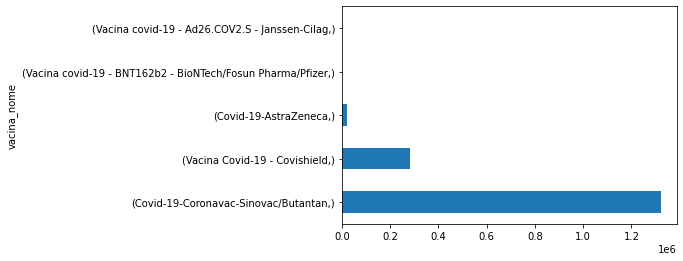

In [6]:
df_vacina_nome_cod = df_vacina[['vacina_nome']];
df_vacina_nome_cod.value_counts().plot(kind='barh')

Dá pra ver que a vacina do butantan é a mais utilizada, tanto é que com ela no gráfico, nem é possível a visualização dos demais dados

#Quais os fabricantes dessas vacinas?

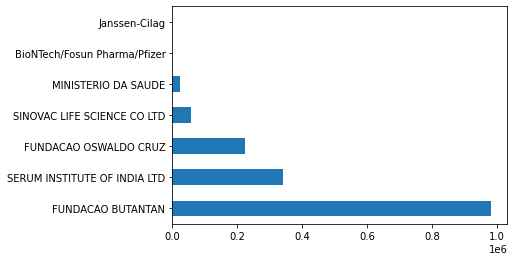

In [7]:
df_vacina.vacina_fabricante_nome.value_counts().plot(kind='barh')

Como o ministério da saude realiza a criação de vacinas? 

In [8]:
df_vacina[df_vacina.vacina_fabricante_nome== 'MINISTERIO DA SAUDE']

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
93,44ddd827-7c0b-445b-985f-22f1f101d115-i0b0,a0d87affa15a3446ae656fe43444e4c49248e7bb5a0b89...,56,1964-11-12,M,3,PARDA,351880.0,10.0,GUARULHOS,BRASIL,SP,NaN,B,2714752,PREFEITURA MUNICIPAL DE ITACURUBA,UNIDADE DE SAUDE DA FAMILIA DE ITACURUBA,260740,ITACURUBA,PE,601,Quilombola,6.0,Povos e Comunidades Tradicionais,CTMAV505,MINISTERIO DA SAUDE,Organization/00394544000851,2021-04-13T03:00:00.000Z,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-04-13 20:52:06,16341
109,0310b9cd-4678-4f47-b668-9f68b4ddf030-i0b0,68bdeb3407aa0d97f73806f92e9e3468b157953807f289...,74,1947-01-15,M,1,BRANCA,260490.0,10.0,CUMARU,BRASIL,PE,55655.0,B,3979547,PREFEITURA MUNICIPAL DE CUMARU,PSF DO MATADOURO,260490,CUMARU,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,CTMAV505,MINISTERIO DA SAUDE,Organization/00394544000851,2021-04-06T03:00:00.000Z,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-04-14 23:41:04,16341
312,e6bdd128-2ff9-40c2-bbda-9f8bf09cd9ab-i0b0,96b63e85fc5c05128a43ff9c24ddace41e8ebf75061848...,69,1951-12-23,M,2,PRETA,260810.0,10.0,JOAO ALFREDO,BRASIL,PE,55720.0,B,5024161,PREFEITURA MUNICIPAL DE JOAO ALFREDO,UNIDADE DE SAUDE DA FAMILIA DE JENIPAPO,260810,JOAO ALFREDO,PE,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,CTMAV505,MINISTERIO DA SAUDE,Organization/00394544000851,2021-03-31T03:00:00.000Z,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-04-07 20:54:33,16341
563,636a0dc8-c5f5-4c63-a743-5603f5eb30b7-i0b0,f825de94fda83aba1ea3d823520573c22a91a26304d4bd...,61,1959-05-02,F,4,AMARELA,261360.0,10.0,SAO JOSE DO EGITO,BRASIL,PE,56700.0,B,2635658,PREFEITURA MUNICIPAL DE SAO JOSE DO EGITO,ESF BAIRRO NOVO HORIZONTE,261360,SAO JOSE DO EGITO,PE,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,CTMAV505,MINISTERIO DA SAUDE,Organization/00394544000851,2021-03-30T03:00:00.000Z,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-04-07 12:03:07,16341
585,c2527821-270a-4b6b-a13e-d2733fd296dd-i0b0,920cc7dac29c3efacbd59f097a36df6781a49a08fc3bcd...,65,1956-03-02,F,99,SEM INFORMACAO,261370.0,10.0,SAO LOURENCO DA MATA,BRASIL,PE,54700.0,B,2435748,FUNDO MUNICIPAL DE SAUDE,CENTRO DE ESPECIALIDADES MEDICAS DE SAO LOUREN...,261370,SAO LOURENCO DA MATA,PE,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,CTMAV505,MINISTERIO DA SAUDE,Organization/00394544000851,2021-03-29T03:00:00.000Z,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-04-17 12:46:06,16341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625083,b9e65068-bc66-4647-bc00-9a84a5850f1b-i0b0,0ff2fbf677046010d1731c332e38fe449bc0085bb1abab...,63,1957-08-09,M,99,SEM INFORMACAO,261360.0,10.0,SAO JOSE DO EGITO,BRASIL,PE,56700.0,B,3983714,PREFEITURA MUNICIPAL DE SAO JOSE DO EGITO,ESF CENTRAL,261360,SAO JOSE DO EGITO,PE,301,Pessoas de 60 nos ou mais Institucionalizadas,3.0,Pessoas de 60 anos ou mais institucionalizadas,CTMAV505,MINISTERIO DA SAUDE,Organization/00394544000851,2021-03-30T03:00:00.000Z,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-04-07 19:45:39,16341
1625215,da6537b9-e5ab-405d-ba56-f33fb8166972-i0b0,5e07883d1834ca6cd3744e8f3c6477c3516c1a3e5ff2a5...,62,1958-12-03,F,3,PARDA,261220.0,10.0,SALGUEIRO,BRASIL,PE,56000.0,B,6542018,PREFEITURA MUNICIPAL DE SALGUEIRO,SMS DE SALG

Dá para perceber que as vacinas são da Oxford, AstraZeneca, mas seu fabricante está como o minitério da saúde.

#Qual o grupo racial que mais tomou vacina?

In [9]:
df_vacina.paciente_racaCor_valor.value_counts()

SEM INFORMACAO    502102
PARDA             393180
AMARELA           342299
BRANCA            293020
PRETA              54450
INDIGENA           40666
Name: paciente_racaCor_valor, dtype: int64

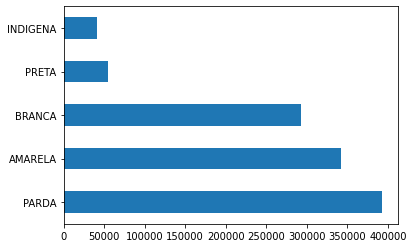

In [10]:
df_vacina.paciente_racaCor_valor.value_counts()[1:].plot(kind='barh')

É notório que pessoas pretas e indigenas são os menos vacinados no estado

#Como anda a vacinação em termos de idade?

In [11]:
df_vacina[['paciente_idade']]

,paciente_idade
0,70
1,71
2,32
3,79
4,35
...,...
1625712,75
1625713,72
1625714,70
1625715,50


In [12]:
df_vacina[['paciente_idade']].describe()

,paciente_idade
count,1.625717e+06
mean,6.358187e+01
std,1.742632e+01
min,0.000000e+00
25%,5.500000e+01
50%,6.900000e+01
75%,7.500000e+01
max,1.210000e+02


Estranho visualizar uma idade minima igual a 0, por isso achei interessante investigar

In [13]:
df_vacina[df_vacina.paciente_idade == 0]

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
774002,250c8ec7-1384-41d8-8440-cc73d4dc1c99-i0b0,65ed77a4e610bf3b73fc1eab54b4eece26bb5e694dec00...,0,2021-01-22,M,3,PARDA,292595.0,10.0,RAFAEL JAMBEIRO,BRASIL,BA,44520.0,B,1392,PREFEITURA DA CIDADE DO RECIFE,US 148 CS DOM MIGUEL DE LIMA VALVERDE,261160,RECIFE,PE,926,Outros,9.0,Trabalhadores de Saúde,202009014,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-22T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-15 12:41:11,16341
923911,9481bee1-9232-4d1b-9b88-09413fbca2cb-i0b0,5567ccfb4bf2c8c2e43891be77fc610bfc9622780fc92e...,0,2020-08-03,F,1,BRANCA,261260.0,10.0,SANTA MARIA DA BOA VISTA,BRASIL,PE,56380.0,B,3935639,MUNICIPIO DE SANTA MARIA DA BOA VISTA,USF RAIMUNDO BEDOR,261260,SANTA MARIA DA BOA VISTA,PE,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,213VCD012Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-04-20T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-04-22 21:19:10,16341


#Qual o total de pessoas com segunda dose e primeira dose?

In [14]:
df_vacina.vacina_descricao_dose.value_counts()

    1ª Dose    1142098
    2ª Dose     483607
    Dose            12
Name: vacina_descricao_dose, dtype: int64

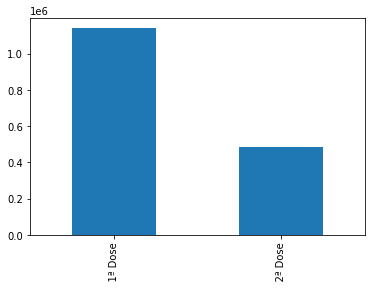

In [26]:
df_vacina.vacina_descricao_dose.value_counts()[:2].plot(kind='bar')

Decidi pegar o id dos pacientes e verificar as doses para achar possíveis Incoerências nos dados 

In [16]:
df_vacina.groupby(['paciente_id','vacina_descricao_dose']).agg({'document_id': 'count'}).sort_values(by='document_id', ascending=False)

,,document_id
paciente_id,vacina_descricao_dose,
80b70b78ec27da9ad2c76cc13f63dbabd432298e896e3194f6f14862c22ee6b9,1ª Dose,4
9af506751738c8270683a39b8787b49e62c8dc575a28db2469838a28176d1450,1ª Dose,3
73c67a2b774c22a3b62b98f0c1c826a01466e66fc6698b4ca58199b2a118c998,1ª Dose,3
6d901c51e25680686ff9b952b3f0e4de0f2be2ac165dfd494d5c55b23d8406c8,1ª Dose,3
1cf5baf0cbdaaa7314a1d546346976b2c326f29150d30210b44acd51e9ff7c69,1ª Dose,3
...,...,...
558df3dc4f545b2ab36d601ad7e43da9a2405620b8429805bafc9569db8ff2d4,1ª Dose,1
558df36656dc05d76d49c722a23d5215dd28a7f999acec00e9ee2b2b21ae44cb,1ª Dose,1
558df1d5bad2acdf44fe9b626fc3db29367dfbc8ac805dcf064edf16798c574e,1ª Dose,1


Como esperado, temos alguns dados surreais, pois é normal um paciente ter tomado até duas doses, mas 4 é algo fora do padrão

In [17]:
df_vacina.drop_duplicates(inplace=True)

In [18]:
df_vacina.groupby(['paciente_id','vacina_descricao_dose']).agg({'document_id': 'count'}).sort_values(by='document_id', ascending=False)

,,document_id
paciente_id,vacina_descricao_dose,
80b70b78ec27da9ad2c76cc13f63dbabd432298e896e3194f6f14862c22ee6b9,1ª Dose,4
b8c71414a25f9364ab8171423904ed24255664653b9ecfafa89ae50041e28798,1ª Dose,3
6e19beb2e1caf2bc8737707864786889ec85f344d097975fcc22350cc07913a4,1ª Dose,3
fcc9733ade7e656086ad524996c4cff26bc33a615da0956793c7f94bfcefe7dc,2ª Dose,3
a83c9687e12e5002fb55084e085b1ef1d9feb6ffcef609bdf910e712426153a0,1ª Dose,3
...,...,...
558717654743c795f2413e3dcd0ec5811f9395b1d4117381d0415601241d856f,1ª Dose,1
558707c62ff20808bcc6a0984e069f454b92f9b8b0a6955c9961ebb1e71aedde,1ª Dose,1
5587025f7f66a9b8e0f1e998f5f236df66d46a7b266972222d2f5fc2f2ce06ab,2ª Dose,1


In [19]:
df_vacina[df_vacina.paciente_id== '80b70b78ec27da9ad2c76cc13f63dbabd432298e896e3194f6f14862c22ee6b9']

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
5174,b856a031-42f6-4cf3-b176-48fa64279629-i0b0,80b70b78ec27da9ad2c76cc13f63dbabd432298e896e31...,69,1951-11-30,M,99,SEM INFORMACAO,261160.0,10.0,RECIFE,BRASIL,PE,52050.0,B,6374980,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,SECRETARIA MUNICIPAL DE SAUDE DO CABO DE SANTO...,260290,CABO DE SANTO AGOSTINHO,PE,926,Outros,9.0,Trabalhadores de Saúde,210016,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-18T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-19 12:10:45,16341
105499,5e392896-ed99-4ab9-9c51-503fcb34eb99-i0b0,80b70b78ec27da9ad2c76cc13f63dbabd432298e896e31...,69,1951-11-30,M,99,SEM INFORMACAO,261160.0,10.0,RECIFE,BRASIL,PE,52050.0,B,20362,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,USF SACRAMENTO,260290,CABO DE SANTO AGOSTINHO,PE,926,Outros,9.0,Trabalhadores de Saúde,202010041,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-23T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-03 16:40:06,16341
166734,c5d69466-366a-42e5-84e6-96428f75bece-i0b0,80b70b78ec27da9ad2c76cc13f63dbabd432298e896e31...,69,1951-11-30,M,99,SEM INFORMACAO,261160.0,10.0,RECIFE,BRASIL,PE,52050.0,B,6374980,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,SECRETARIA MUNICIPAL DE SAUDE DO CABO DE SANTO...,260290,CABO DE SANTO AGOSTINHO,PE,926,Outros,9.0,Trabalhadores de Saúde,202010041,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-19T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-19 17:42:04,16341
458934,ed28f29c-a1e1-4e83-9abf-ff33ee01d0ea-i0b0,80b70b78ec27da9ad2c76cc13f63dbabd432298e896e31...,69,1951-11-30,M,99,SEM INFORMACAO,261160.0,10.0,RECIFE,BRASIL,PE,52050.0,B,6374980,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,SECRETARIA MUNICIPAL DE SAUDE DO CABO DE SANTO...,260290,CABO DE SANTO AGOSTINHO,PE,926,Outros,9.0,Trabalhadores de Saúde,202010041,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-17T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-19 03:32:33,16341
1456039,fe15974c-8511-4be0-944d-b7d3bcb42bc3-i0b0,80b70b78ec27da9ad2c76cc13f63dbabd432298e896e31...,69,1951-11-30,M,99,SEM INFORMACAO,261160.0,10.0,RECIFE,BRASIL,PE,52050.0,B,6374980,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,SECRETARIA MUNICIPAL DE SAUDE DO CABO DE SANTO...,260290,CABO DE SANTO AGOSTINHO,PE,926,Outros,9.0,Trabalhadores de Saúde,210016,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-17T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-20 01:24:45,16341


Após observar o paciente com 4 doses, vemos que realmente tem dados duplicados e que o mesmo já tomou as duas doses necessárias totalizando assim 3 dados de replicatas que eu não sei um motivo de estar ai

#A partir de quando são os dados e quando começou a vacinação no estado?

In [20]:
df_vacina.vacina_dataAplicacao = pd.to_datetime(df_vacina.vacina_dataAplicacao)
df_vacina.vacina_dataAplicacao.sort_values()

622242    2021-01-12 00:00:00+00:00
644113    2021-01-12 00:00:00+00:00
1565594   2021-01-12 00:00:00+00:00
1543061   2021-01-12 00:00:00+00:00
898458    2021-01-12 00:00:00+00:00
                     ...           
984787    2021-04-26 03:00:00+00:00
1006835   2021-04-26 03:00:00+00:00
990763    2021-04-26 03:00:00+00:00
1006787   2021-04-26 03:00:00+00:00
1002435   2021-04-26 03:00:00+00:00
Name: vacina_dataAplicacao, Length: 1624711, dtype: datetime64[ns, UTC]

Dá para ver que a população do estado começou a se vacinada no dia 12 e como os dados sãq atualizados todos os dias, também temos dados da data de ontem

#Como anda a vacinação por municipio?

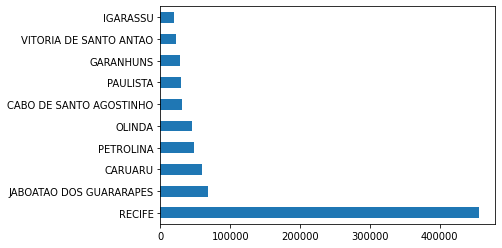

In [21]:
df_vacina.estabelecimento_municipio_nome.value_counts().head(10).plot(kind='barh')

Como era de se esperar as maiores cidades do estado saem disparados em temos de vacinação, por isso resolvi removelas da disputa para olhas a região metropolitana 

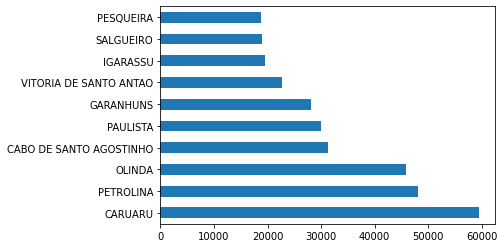

In [22]:
df_vacina.estabelecimento_municipio_nome.value_counts()[2:].head(10).plot(kind='barh')

Dá para notar que temos cidades com grande poder economico para a região 

#Como andam as vacinas em termos de sexo por vacinação?

In [23]:
df_vacina.paciente_enumSexoBiologico

0          M
1          F
2          F
3          F
4          M
          ..
1625712    F
1625713    F
1625714    F
1625715    F
1625716    M
Name: paciente_enumSexoBiologico, Length: 1624711, dtype: object

In [24]:
df_vacina.paciente_enumSexoBiologico.value_counts()

F    986355
M    638356
Name: paciente_enumSexoBiologico, dtype: int64

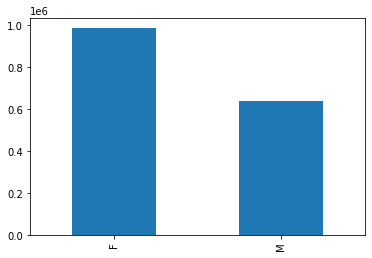

In [25]:
df_vacina.paciente_enumSexoBiologico.value_counts().plot(kind='bar')

Dá para observar uma predominância de mulheres vacinadas